# Customer Segmentation

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

The task is to segment customers based on their transaction histories. Specify the algorithm you decided to use for this task and the reason behind your choice.

**Things Expected**
- Reasoning behind choice of number of clusters for the segmentation
- A cluster plot with different colors for each cluster
- Description of each cluster i.e. features common across various clusters
- A csv output containing feature averages for each cluster. Do add the number of users in each cluster

**NB:** Kindly add comments to the cells describing what is done at each step

In [1]:
# importing basic packages
# Import the necessary pythonpackages that can help in building the model or plotting values
import pandas as pd

In [2]:
# reading input data
train_data = pd.read_csv("../../Customer Segmentation/data/data.csv", encoding = "ISO-8859-1")

In [3]:
train_data.shape

(541909, 8)

In [4]:
train_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


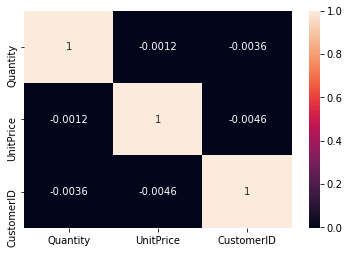

In [6]:
#checking for collinearity in features
import seaborn as sns
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix, annot = True)

#no collinearity in features, so we can go ahead and build model

In [7]:
train_data.dropna(inplace = True)
train_data.reset_index(inplace = True, drop = True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.8+ MB


In [8]:
train_data.drop(['InvoiceNo', 'StockCode', 'Description'], inplace=True, axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Quantity     406829 non-null  int64  
 1   InvoiceDate  406829 non-null  object 
 2   UnitPrice    406829 non-null  float64
 3   CustomerID   406829 non-null  float64
 4   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 15.5+ MB


In [9]:
categorical_features = [ 'Country']
train_data_dummies = pd.get_dummies(train_data[categorical_features], prefix=categorical_features)
train_data = pd.concat([train_data, train_data_dummies], axis=1)
train_data.drop(categorical_features, inplace=True, axis=1)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Quantity                      406829 non-null  int64  
 1   InvoiceDate                   406829 non-null  object 
 2   UnitPrice                     406829 non-null  float64
 3   CustomerID                    406829 non-null  float64
 4   Country_Australia             406829 non-null  uint8  
 5   Country_Austria               406829 non-null  uint8  
 6   Country_Bahrain               406829 non-null  uint8  
 7   Country_Belgium               406829 non-null  uint8  
 8   Country_Brazil                406829 non-null  uint8  
 9   Country_Canada                406829 non-null  uint8  
 10  Country_Channel Islands       406829 non-null  uint8  
 11  Country_Cyprus                406829 non-null  uint8  
 12  Country_Czech Republic        406829 non-nul

In [10]:
import datetime
date_time_list = []
for date_str in train_data['InvoiceDate']:
    date_time_obj = datetime.datetime.strptime(date_str, '%m/%d/%Y %H:%M')
    time_float = date_time_obj.timestamp()
    date_time_list.append(time_float)

In [11]:
train_data['InvoiceDate'] = date_time_list
train_data

,Quantity,InvoiceDate,UnitPrice,CustomerID,Country_Australia,Country_Austria,Country_Bahrain,Country_Belgium,Country_Brazil,Country_Canada,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,6,1.291192e+09,2.55,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,1.291192e+09,3.39,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8,1.291192e+09,2.75,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,1.291192e+09,3.39,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,6,1.291192e+09,3.39,17850.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,12,1.323435e+09,0.85,12680.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406825,6,1.323435e+09,2.10,12680.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406826,4,1.323435e+09,4.15,12680.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406827,4,1.323435e+09,4.15,12680.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0).fit(train_data)
print('Labels: ', kmeans.labels_)
print('Centroids: ', kmeans.cluster_centers_)



Labels:  [1 1 1 ... 0 0 0]
Centroids:  [[ 1.05510899e+01  1.32094885e+09  3.22193691e+00  1.53169649e+04
   3.70157111e-04  1.07756848e-03 -6.56890991e-17  4.91075101e-03
   1.35620139e-16 -3.17617026e-16  8.39022785e-04  1.94949412e-03
   2.46771407e-05  9.62408489e-04  1.81952784e-02  1.02565526e-16
   1.66981986e-03  2.04408982e-02  1.99062269e-02  2.96125689e-04
   4.77091388e-04  8.33426210e-16  2.98593403e-03  4.60639961e-04
   1.02809471e-16 -6.15284733e-17  1.89191412e-04  4.54059390e-03
   3.09286831e-03  6.08702805e-04  3.52060541e-03  4.77091388e-04
   2.50179651e-17  2.96125689e-04  5.61816238e-03  1.06111705e-03
   3.57818541e-03  2.21271695e-03 -2.62756397e-16  9.00238546e-01
   4.10262102e-16]
 [ 1.17621077e+01  1.29384328e+09  3.27201066e+00  1.53475173e+04
   3.15497452e-03  5.43961125e-04 -4.03187683e-18  3.06431434e-03
  -1.26716129e-17  1.25225351e-16  8.88469837e-04  3.46321916e-03
   8.33615945e-17  3.62640750e-04  1.17858244e-02 -1.75966013e-16
   5.07697050e-04 

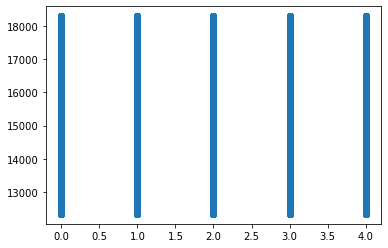

In [22]:
import matplotlib.pyplot as plt
plt.scatter(kmeans.labels_, train_data['CustomerID'])

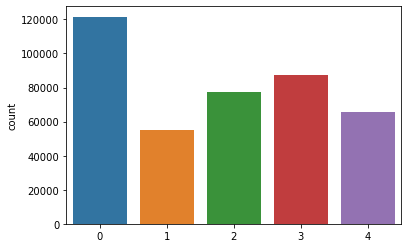

In [24]:
sns.countplot(x = kmeans.labels_, label = 'count')